# 04. 머신러닝 지도학습 모델 

## (1) 데이터 전처리 및 분류

#### (1-1) 데이터 전처리

In [1]:
# 'data_path' 를 입력받아서 pandas 로 csv 파일을 읽는 'load_csv' 함수 작성

import pandas as pd

def load_csv(data_path):
    data = pd.read_csv(data_path)
    return data

In [2]:
# 'load_csv' 함수로 'heart.csv' 파일 로드
data_path = "../src/heart.csv"
data = load_csv(data_path)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### (1-2) 데이터 분류 (train / test)

In [3]:
# 'data' 에서 'target' column 을 제거한 나머지 columns 로 새로운 dataframe 'predictor_columns' 를 만들고, 'taregt' column 만 존재하는 새로운 dataframe 'target_column' 만들기
from sklearn.model_selection import train_test_split

predictor_columns = data.drop("target",axis=1)
target_column = data["target"]

In [4]:
# 'predictor_columns' 와 'target_column' 를 train 과 test 비율 8:2 로 데이터를 나누기
x_train, x_test, y_train, y_test = train_test_split(predictor_columns, target_column, test_size=0.20)

## 2. 모델 훈련

#### (2-1) K-Nearest Neighbors

In [5]:
# python 'sklearn' package 를 활용하여 'K-Nearest Neighbors' 모델 정의
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [6]:
# 'knn' 모델에 x_train 학습
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# 학습한 'knn' 모델에 x_test 테스트
y_test_pred = knn.predict(x_test)

## 3. 모델 검증

In [8]:
# x_test 결과와 y_test 비교
from sklearn.metrics import accuracy_score

score_knn = round(accuracy_score(y_test_pred, y_test)*100,2)
score_knn

91.22

## 4. 모델 시각화

<AxesSubplot: xlabel='Algorithms', ylabel='Accuracy score'>

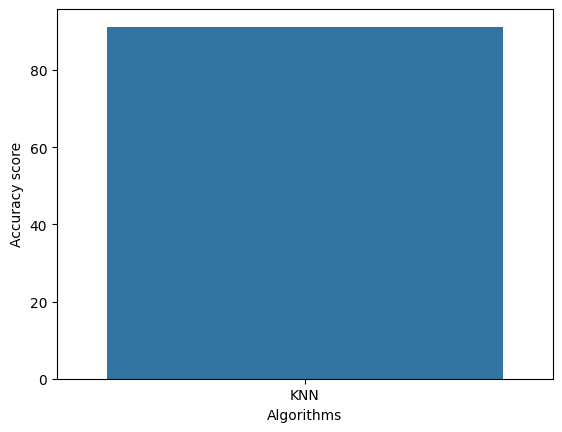

In [9]:
# 'seaborn' package 로 K-Nearest Neighbors' 모델의 정확도 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=['KNN'], y=[score_knn])

## 2+a. 다양한 모델 적용해보기 

In [10]:
# 모델 학습 결과를 저장할 dictionary 선언
scores = {}

#### (2-1) K-Nearest Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_test_pred = knn.predict(x_test)
score_knn = round(accuracy_score(y_test_pred, y_test)*100, 2)
scores['knn'] = score_knn
scores

{'knn': 72.68}

#### (2-2) Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_test_pred = lr.predict(x_test)
score_lr = round(accuracy_score(y_test_pred, y_test)*100, 2)
scores['lr'] = score_lr
scores

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'knn': 72.68, 'lr': 84.39}

#### (2-3) Naive Bayes

#### (2-4) SVM

#### (2-5) Decision Tree

#### (2-6) Random Forest

#### (2-7) XGBoost

In [13]:
%pip install xgboost


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### (2-8) Neural Network

In [14]:
%pip install keras
%pip install tensorflow


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### 추론

In [15]:
# 'logistic regression' 모델을 저장하고, 불러와서 임의의 값 대입하여 결과 예측하기

#### 모델별 정확도 비교하기

## 4+a. 전체 모델 시각화

In [16]:
# 'seaborn' package 를 활용하여 모델 결과 막대 그래프 (bar plot) 로 그리기